In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Dataset//data.csv", delimiter = ";", decimal = ",")
print(len(df))
df

9471


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Data Set Overview:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

## Attribute Information:

0 Date (DD/MM/YYYY)

1 Time (HH.MM.SS)

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer)

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in °C

13 Relative Humidity (%)

14 AH Absolute Humidity


# 2. Data Analysis and Summarization Before Preprocess

First off, let's check the datatype of each column to see if there are any non-numeric columns we should exclude for our pre-Preprocess Analysis:

In [3]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

Then, we drop the non-numeric columns leaving us only with the numeric columns to easily analyze the distribution and the correlation among the numeric columns. 

In [4]:
df = df.drop(columns=["Date", "Time"])
len(df.columns)
df.shape
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


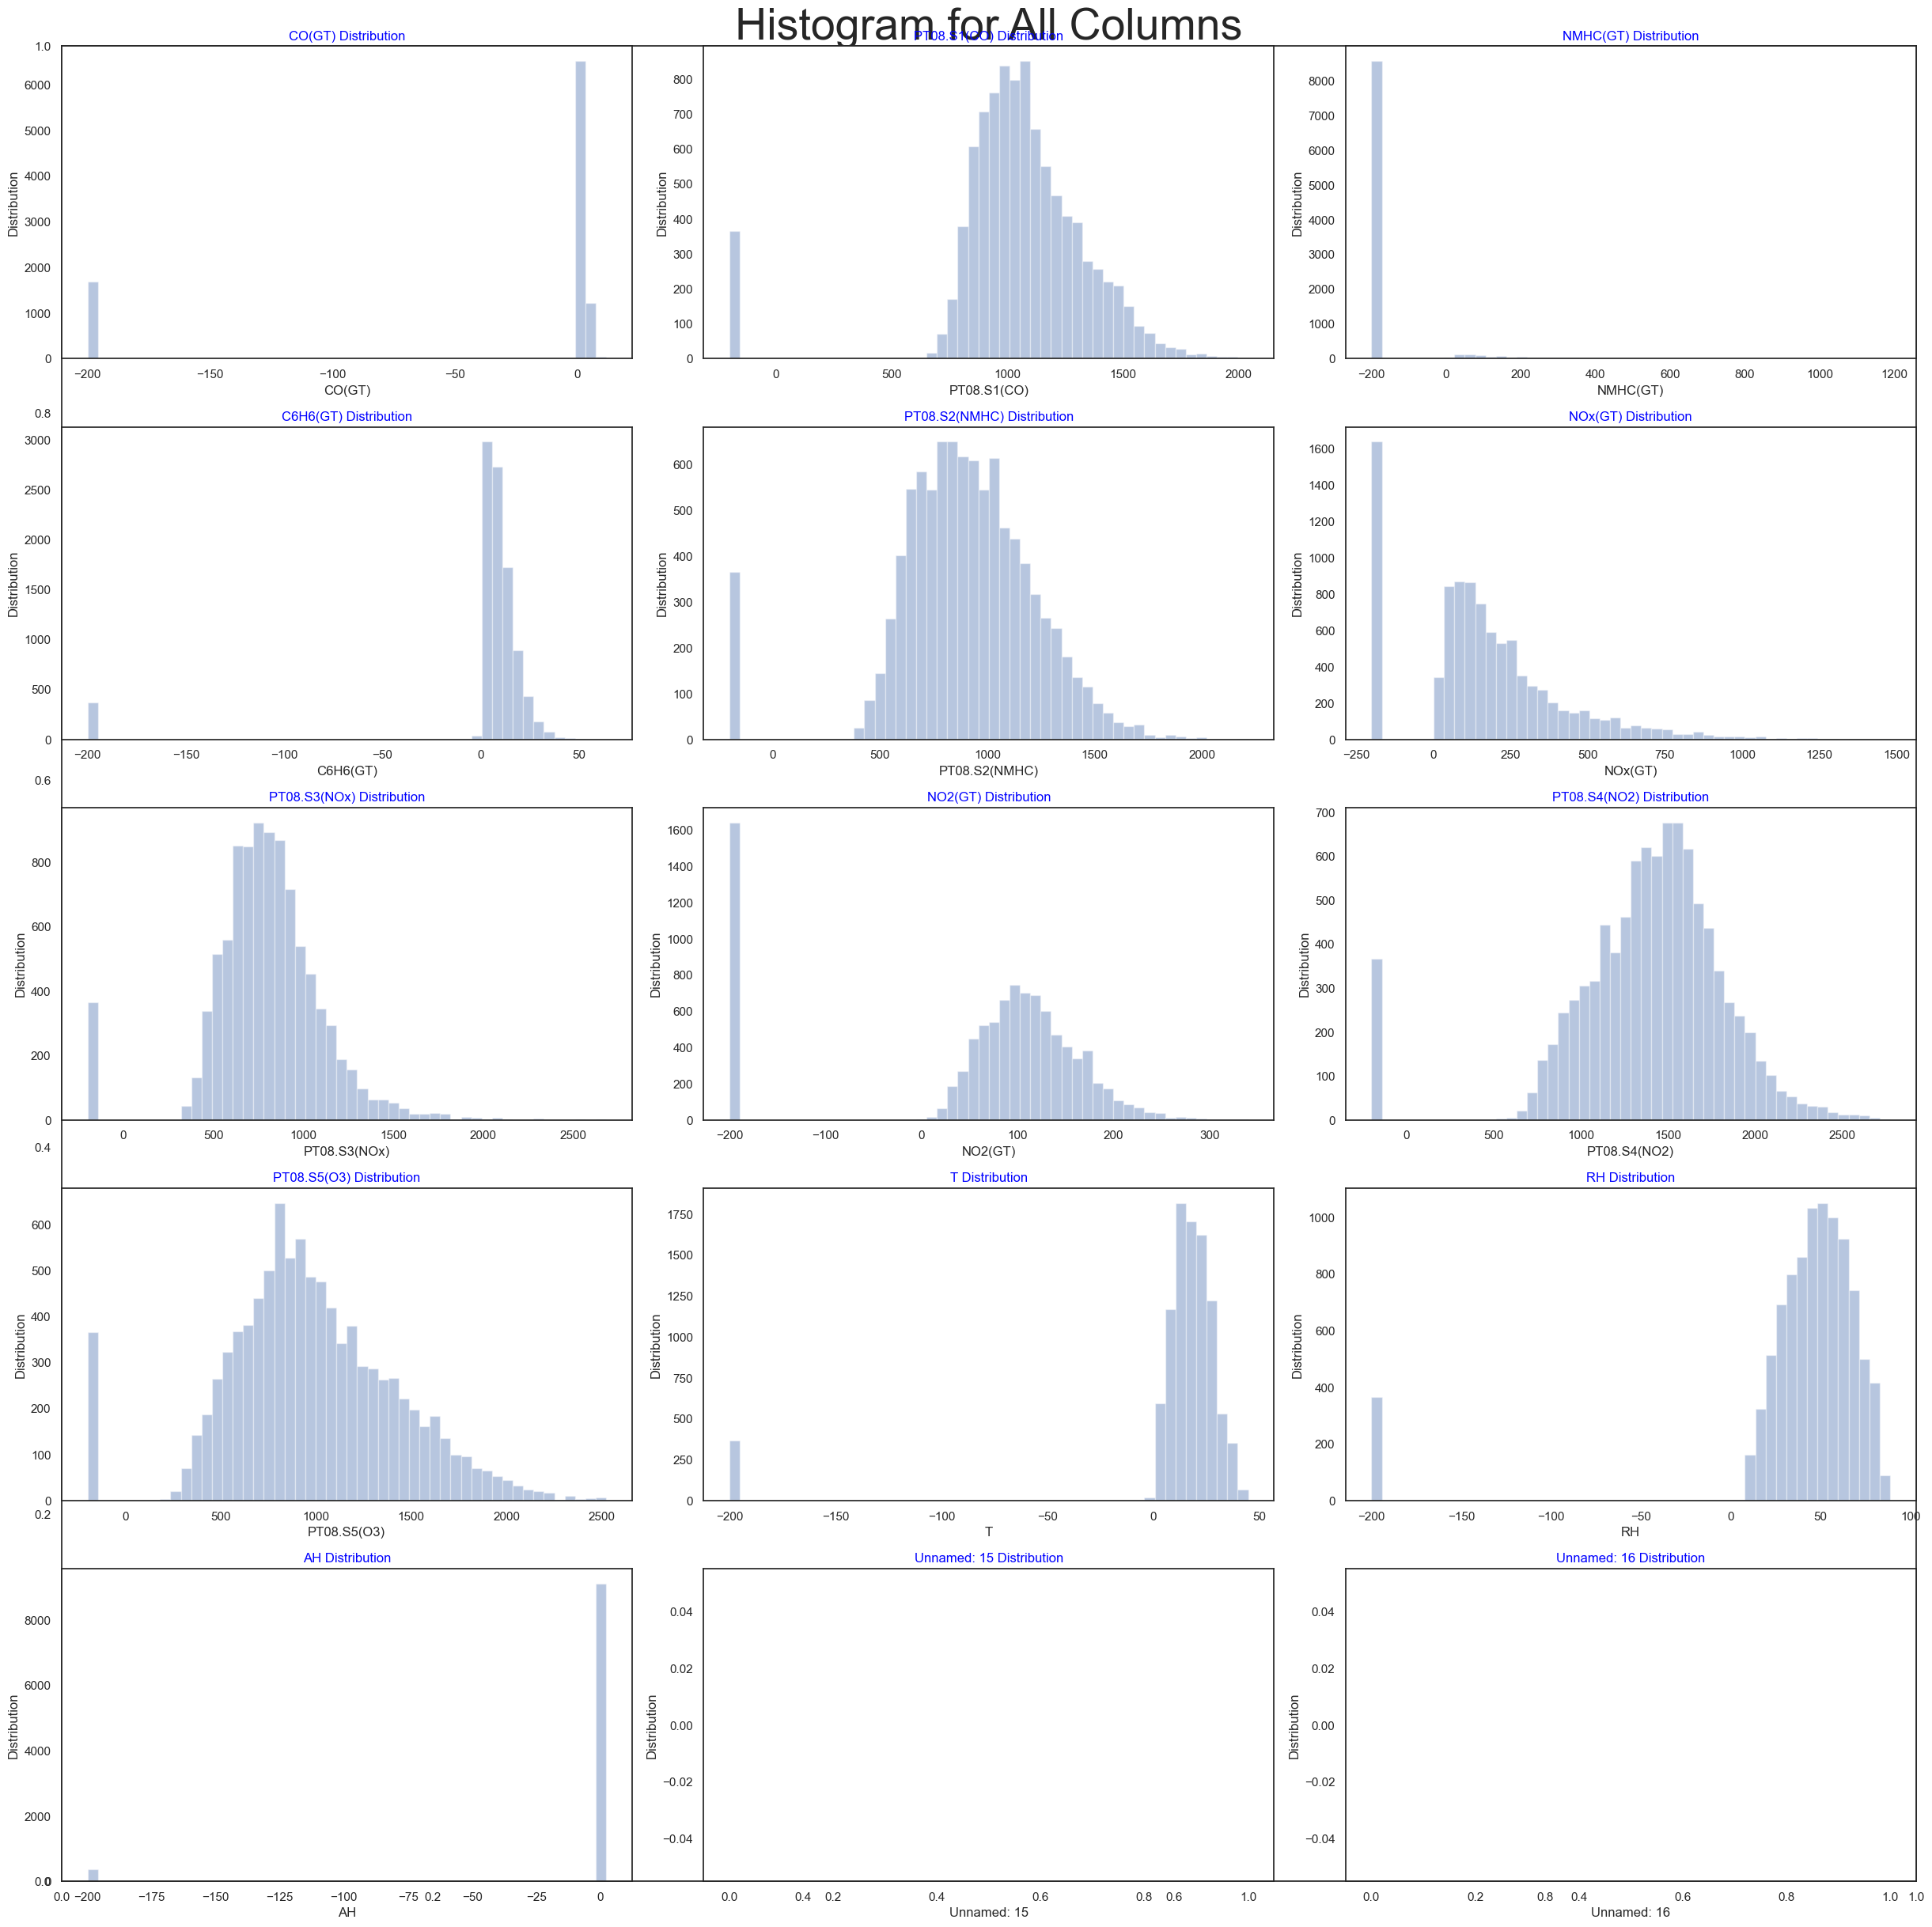

In [5]:
#Plot grid histogram of all predictor variables
f=plt.figure(figsize=(25,25))
plt.title('Histogram for All Columns', fontsize = 40)
for i, col in enumerate(df.columns):
    ax=f.add_subplot(5,3,i+1)
    sns.distplot(df[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

Looking at the histogram plots above, we can see that the last two columns are empty and should be removed. We can also see that almost all of the columns have negative outlier values which does not make sense as a sensor reading with a unit of mg/m^3 cannot be negative because, physically, negative density value is nonsensical. This can be seen in the leftward 'spike' in the many of the distribtuions above such as in CO(GT) and NMHC(GT) columns. These nonsensical values could be a results of sensor misreadings or a feature of the air concentration sensor itself, as a preset calibration value for the specific sensor used in data collection.

Removing last two empty columns:

In [6]:
df.dropna(axis = 0, how = 'all', inplace = True)
df.shape

(9357, 15)

In [7]:
#df.dropna(axis = 1, how = 'all', inplace = True)
df.drop(columns=["Unnamed: 15", "Unnamed: 16"], inplace = True)
df.shape

(9357, 13)

As explained above, the negative values are nonsensical for the gas concentration data columns (which are all columns except for the temperature column 'T'). So, we look at the range of the individual columns below and see that most if not all of the outliers are fixed at a value of **-200**.

In [8]:
for i, col in enumerate(df.columns):
    print(col,'min: ',df[col].min(), 'max: ',df[col].max())

CO(GT) min:  -200.0 max:  11.9
PT08.S1(CO) min:  -200.0 max:  2040.0
NMHC(GT) min:  -200.0 max:  1189.0
C6H6(GT) min:  -200.0 max:  63.7
PT08.S2(NMHC) min:  -200.0 max:  2214.0
NOx(GT) min:  -200.0 max:  1479.0
PT08.S3(NOx) min:  -200.0 max:  2683.0
NO2(GT) min:  -200.0 max:  340.0
PT08.S4(NO2) min:  -200.0 max:  2775.0
PT08.S5(O3) min:  -200.0 max:  2523.0
T min:  -200.0 max:  44.6
RH min:  -200.0 max:  88.7
AH min:  -200.0 max:  2.231


Replacing the negative nonsensical outliers of -200 with NaN:

In [9]:
for i, col in enumerate(df.columns):
    df[col].values[df[col].values < -20] = np.NaN

Looking at the number of NaN columns below, we see that NMHC (GT) column has 8443 columns with at least one NaN value among the total 9357, which means that almost 90% of the entire column is filled with NaN values. So, we will be deleting this column to preserve the data quality. 

In [10]:
df.isna().sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [11]:
df.drop(columns=["NMHC(GT)"], inplace = True)
df.shape

(9357, 12)

# 3. Data cleaning

## 1. Identify outliers and smooth out noisy data:

Removing the outliers that are outside the range (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR):

In [12]:
# Calculate quantiles and IQR
cols = df.columns
Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

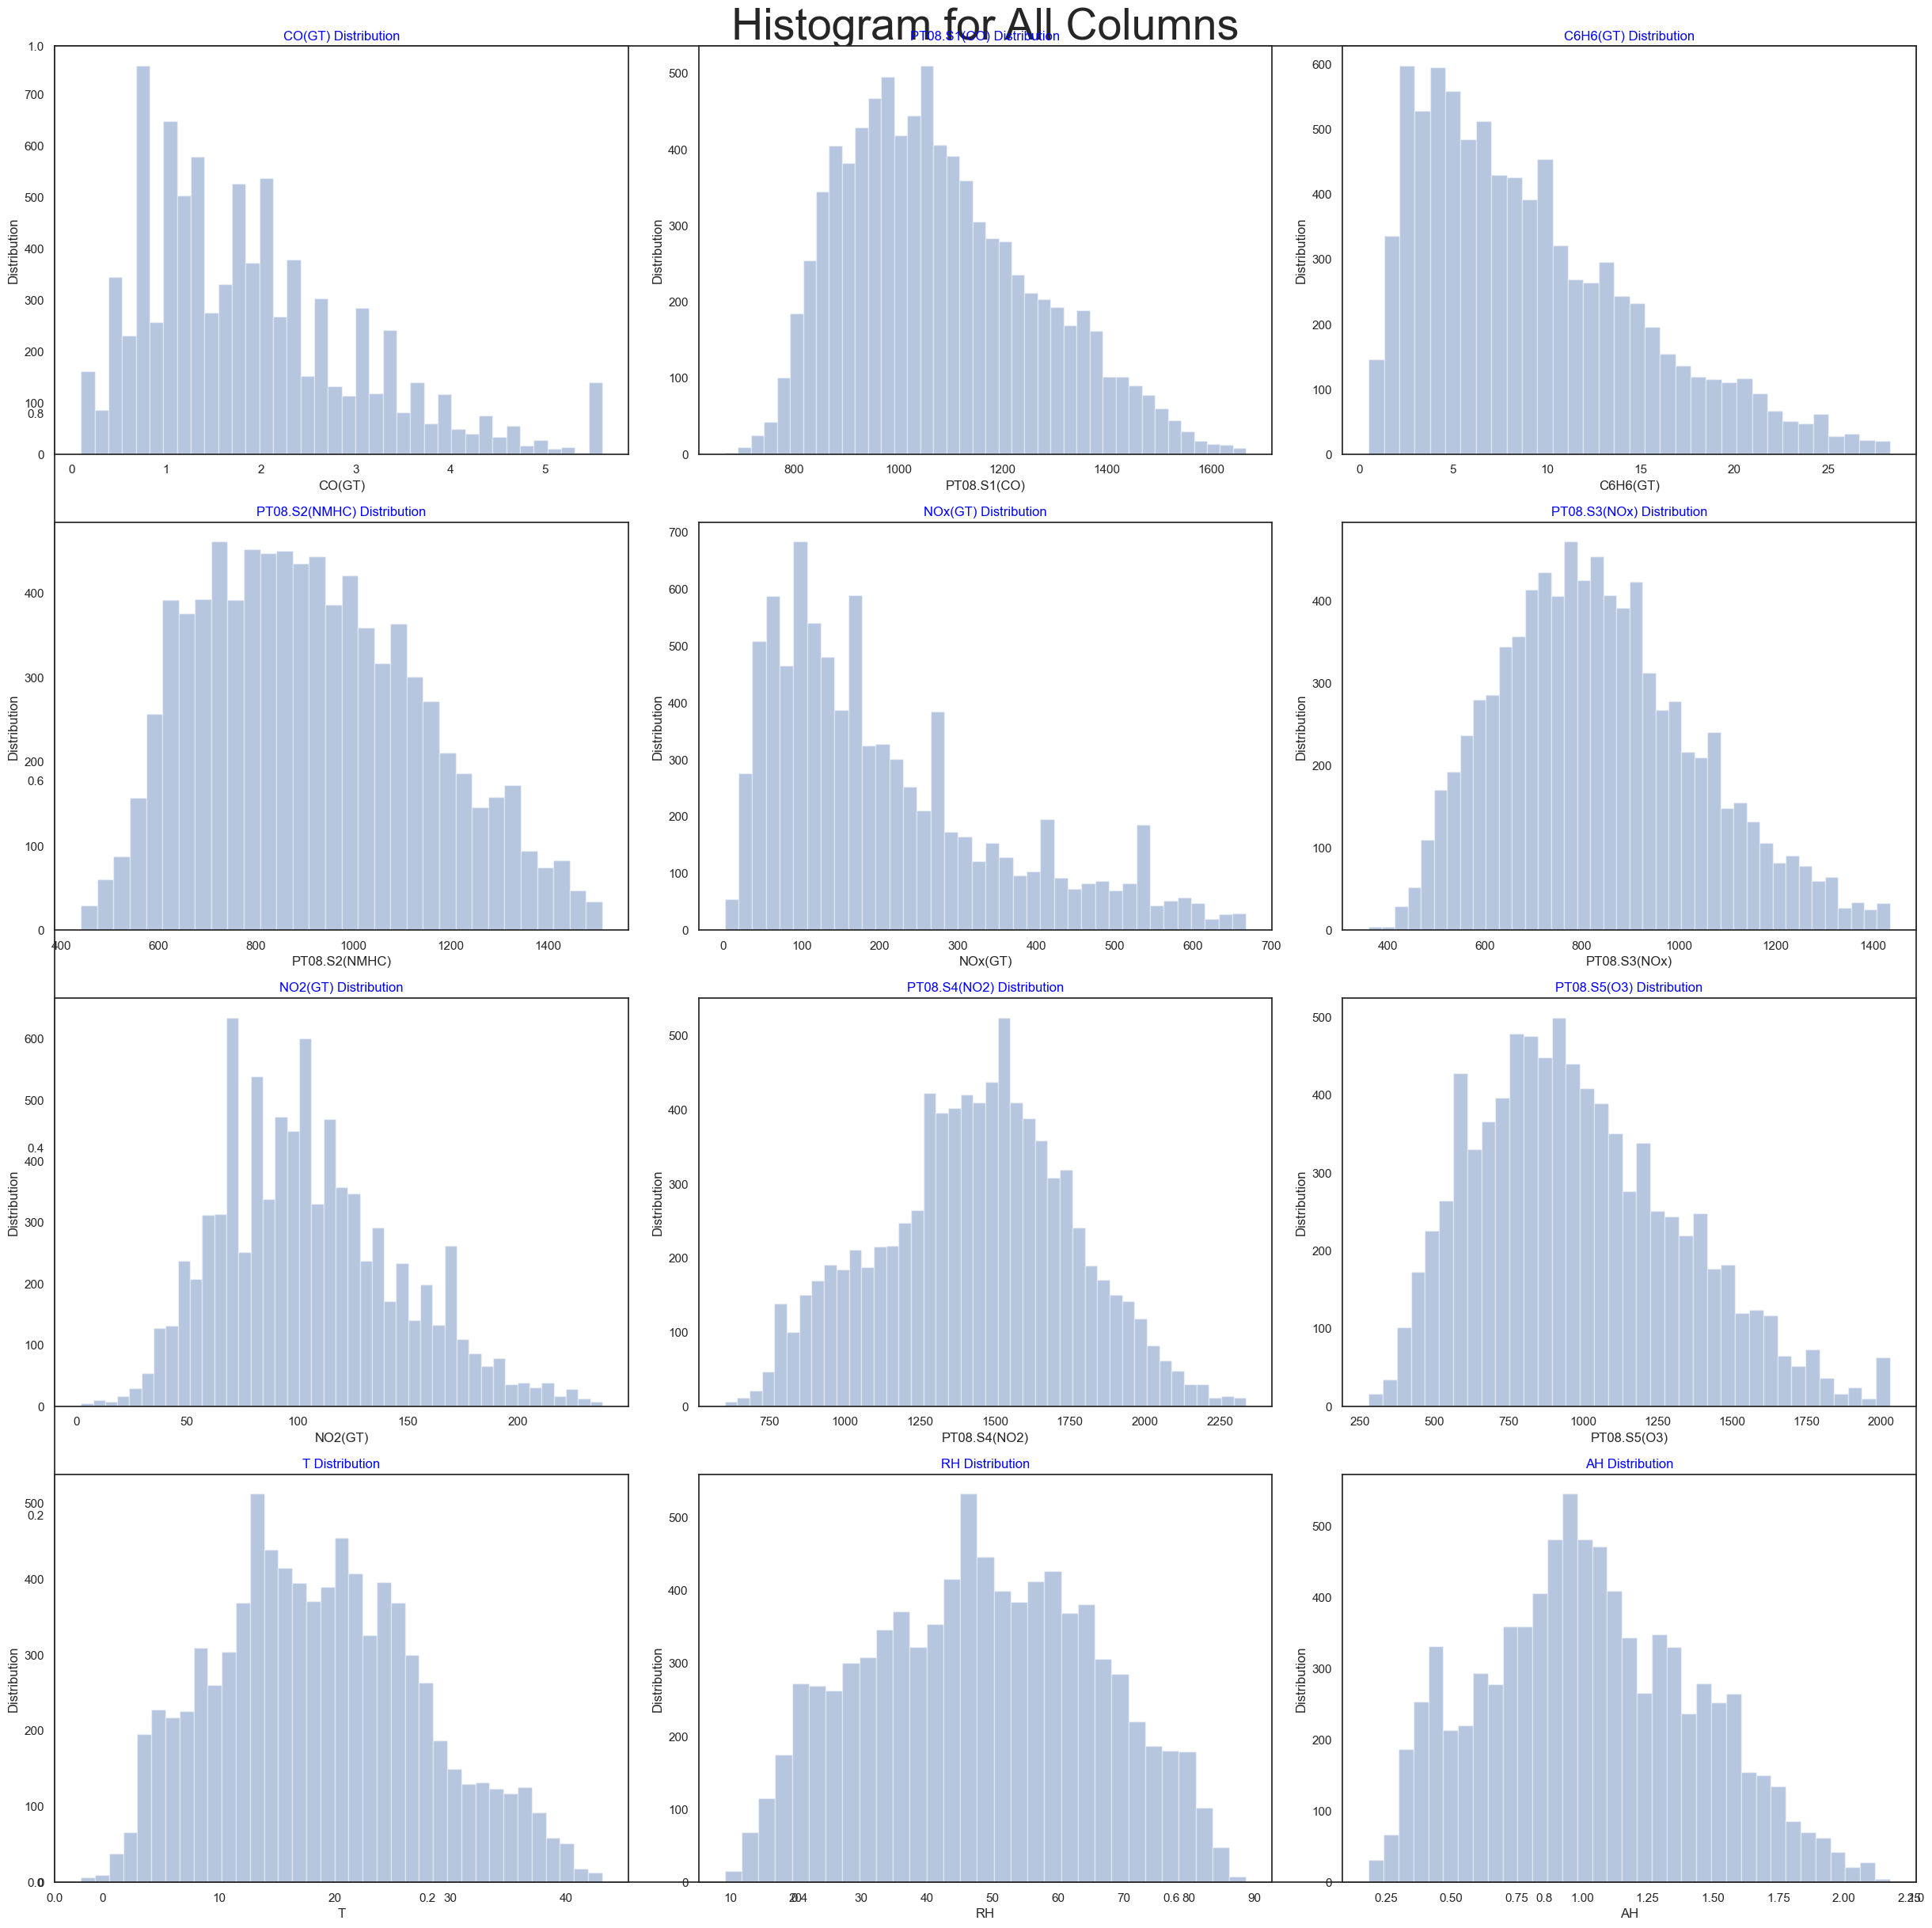

In [13]:
#Plot grid histogram of all predictor variables
f=plt.figure(figsize=(25,25))
plt.title('Histogram for All Columns', fontsize = 40)
for i, col in enumerate(df.columns):
    ax=f.add_subplot(4,3,i+1)
    sns.distplot(df[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

As seen in the above historgrams, all of the columns keep their initial distribution and are now ready for the next step of dealing with NaN values.

## 2. Fill in missing values:

Filling in missing values (attribute or class value): By using the attribute mean for all data:

In [14]:
df.fillna(df.mean(),inplace = True)

In [15]:
df.shape

(8458, 12)

In [16]:
df.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

<AxesSubplot: >

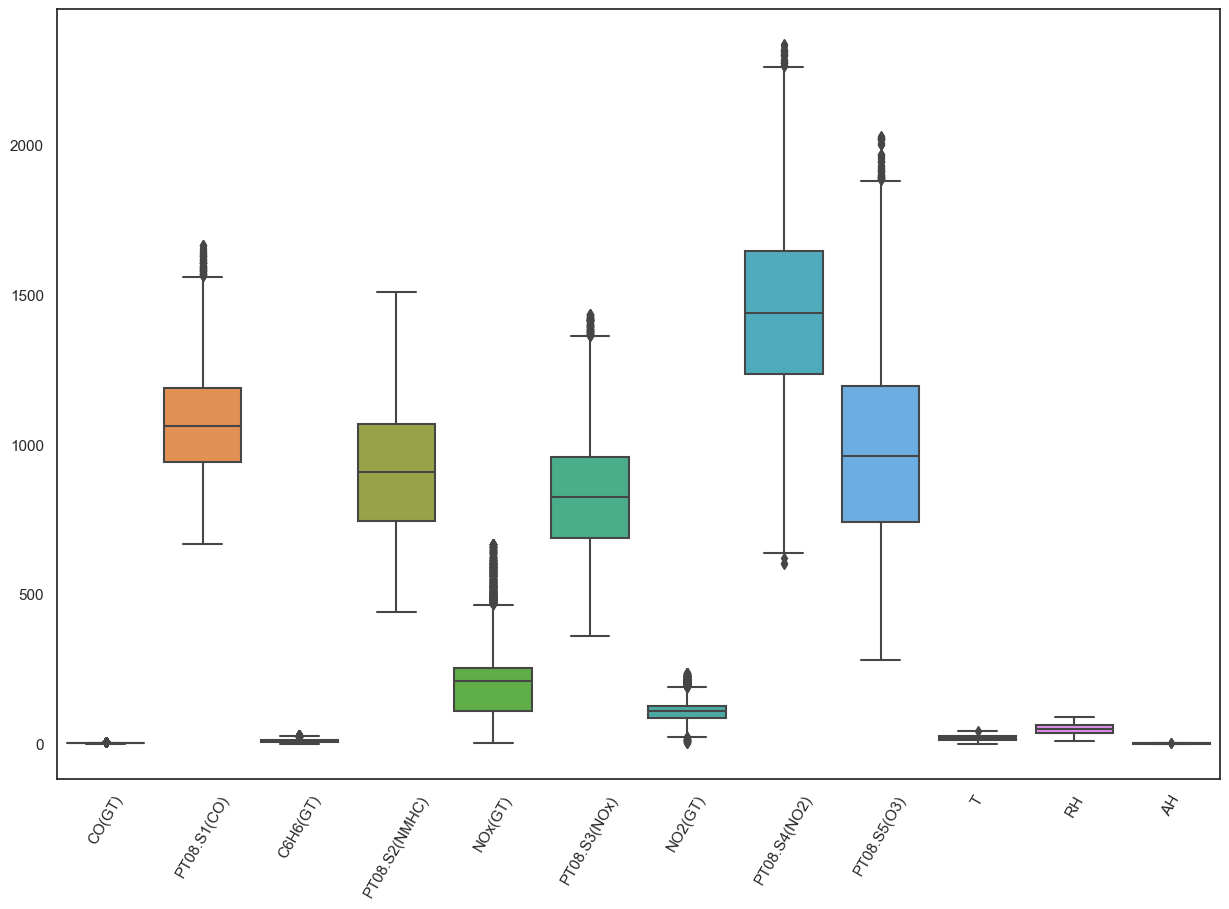

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=df, ax=ax)

<AxesSubplot: >

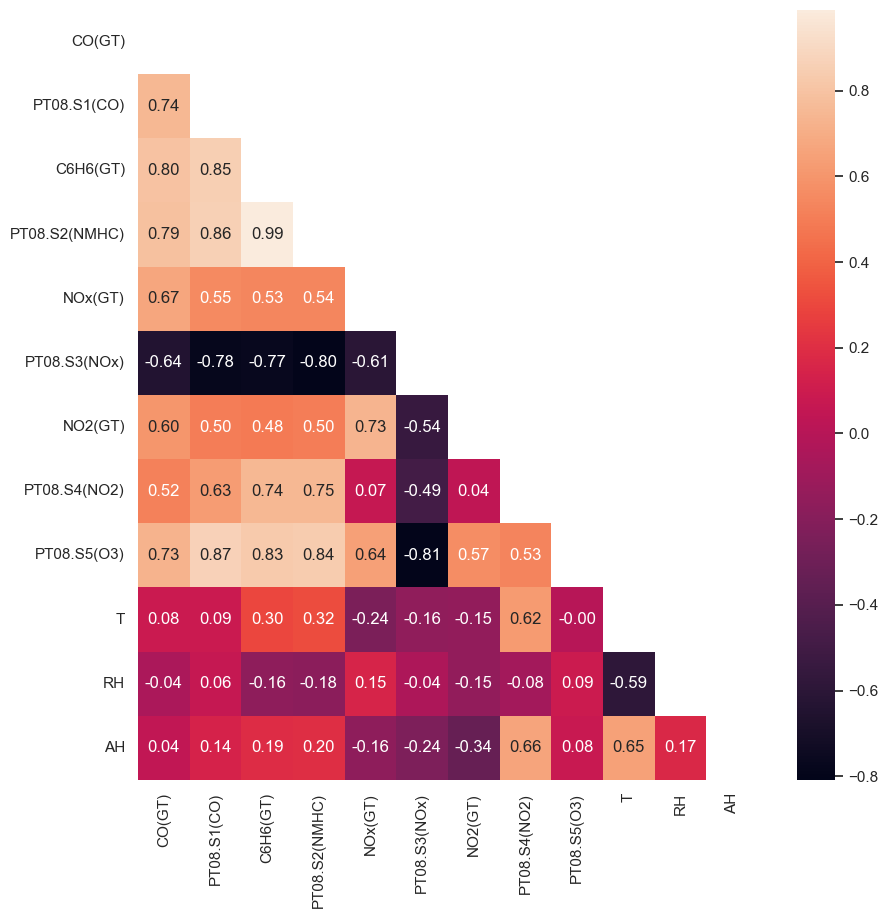

In [18]:
mask = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data = df.corr(), annot = True, fmt=".2f", ax = ax, mask = mask)

# 4. Data transformation

## 1. Normalization

In [19]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_df = scaler.fit_transform(df)
df_scaled = pd.DataFrame(Scaled_df,columns=df.columns)
df_scaled

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.690438,1.567217,0.474960,0.593530,-0.320861,1.088161,0.125721,0.806163,0.871293,-0.592497,0.017075,-0.704967
1,0.079509,1.189711,0.041081,0.183394,-0.793825,1.671238,-0.431245,0.382813,-0.031138,-0.626859,-0.053238,-0.786149
2,0.283152,1.800383,-0.028339,0.111282,-0.583619,1.503233,0.152244,0.370080,0.279835,-0.787216,0.315906,-0.724068
3,0.283152,1.656042,0.006371,0.151845,-0.275817,1.266049,0.364421,0.462390,0.673124,-0.890302,0.667471,-0.632330
4,-0.327777,1.078679,-0.462218,-0.352939,-0.583619,1.824420,0.205288,0.163179,0.389590,-0.867394,0.644033,-0.627052
...,...,...,...,...,...,...,...,...,...,...,...,...
8453,1.199546,1.311845,0.752642,0.841415,1.976389,-1.466510,2.167930,-0.206059,2.276767,0.358189,-1.131372,-0.707480
8454,0.486795,0.473559,0.388184,0.507897,1.083014,-1.145323,1.876186,-0.556199,0.874341,0.633086,-1.459499,-0.820330
8455,0.486795,0.356976,0.561735,0.670149,0.632572,-1.150265,1.770098,-0.629410,0.334712,0.930891,-1.775908,-0.999534
8456,0.181330,-0.414692,0.058437,0.210436,0.197146,-0.661072,1.266176,-1.266028,-0.646986,1.091248,-2.057160,-1.317978


# 5. Data Reduction

# 1. Reducing the number of attributes down to 6 from 13 columns:

We will be using Principal Component Analysis (PCA) for the data reduction step:

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA()
pca.fit(df)
PC_components = np.arange(pca.n_components_) + 1

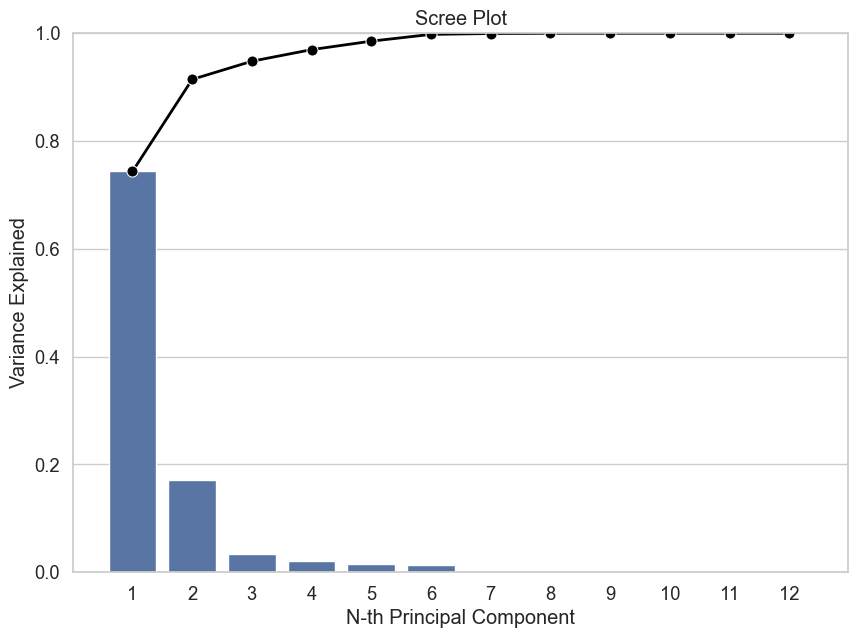

In [22]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Looking at the Scree Plot above, we see that we can keep only 6 columns instead of all 13 since keeping the first 6 principal components are enough to explain all of the variance in the dataset.

In [23]:
# Perform PCA (Choose n_components to keep)
pca = PCA(n_components=6)
pca_array = pca.fit_transform(df)

# Convert back to DataFrame for readability
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]

#df_pca['label'] = y
df_pca.shape
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,357.838838,-129.628677,325.102541,99.381016,180.882914,6.646599
1,7.735332,-195.944410,265.448531,132.336678,246.426774,28.413881
2,112.081411,-121.706994,303.031451,114.472123,305.078116,-29.213637
3,220.771374,-69.477425,333.481819,95.529191,226.094003,-44.660483
4,-4.335208,-76.500118,390.559159,92.056538,190.056153,-43.099867


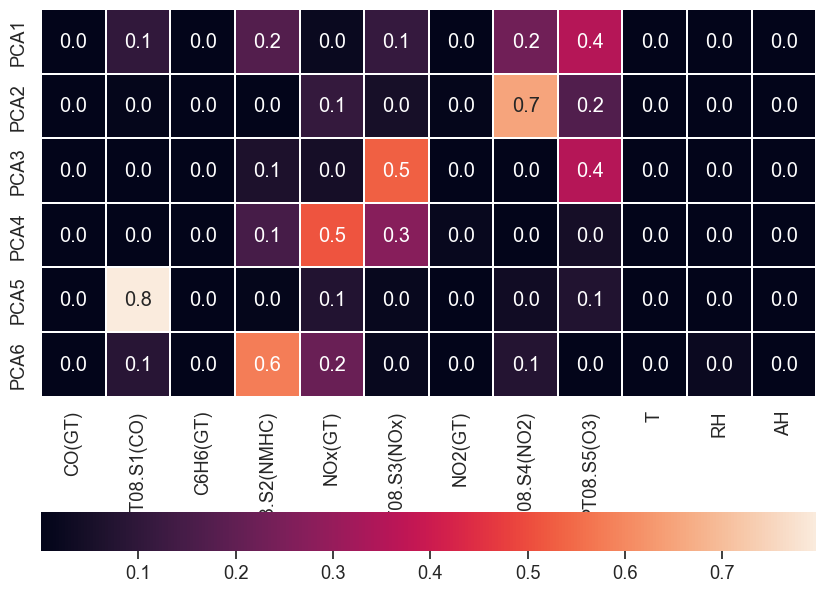

In [24]:
# Feature Weight
fig, ax = plt.subplots(figsize=(10,10))
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(df.columns),
                 ax = ax,
                 annot=True,
                 fmt='.1f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

As we can see from the correlation graph above, six columns to be kept are PT08.S1(CO), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), PT08.S4(NO2), and PT08.S5(O3). Because these six columns are enough to explain all of the variance in the data alone.

In [25]:
df_scaled = df_scaled[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]

In [26]:
df_scaled

,PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3)
0,1.567217,0.593530,-0.320861,1.088161,0.806163,0.871293
1,1.189711,0.183394,-0.793825,1.671238,0.382813,-0.031138
2,1.800383,0.111282,-0.583619,1.503233,0.370080,0.279835
3,1.656042,0.151845,-0.275817,1.266049,0.462390,0.673124
4,1.078679,-0.352939,-0.583619,1.824420,0.163179,0.389590
...,...,...,...,...,...,...
8453,1.311845,0.841415,1.976389,-1.466510,-0.206059,2.276767
8454,0.473559,0.507897,1.083014,-1.145323,-0.556199,0.874341
8455,0.356976,0.670149,0.632572,-1.150265,-0.629410,0.334712
8456,-0.414692,0.210436,0.197146,-0.661072,-1.266028,-0.646986


In [27]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,357.838838,-129.628677,325.102541,99.381016,180.882914,6.646599
1,7.735332,-195.944410,265.448531,132.336678,246.426774,28.413881
2,112.081411,-121.706994,303.031451,114.472123,305.078116,-29.213637
3,220.771374,-69.477425,333.481819,95.529191,226.094003,-44.660483
4,-4.335208,-76.500118,390.559159,92.056538,190.056153,-43.099867
...,...,...,...,...,...,...
8453,710.687550,534.568598,129.972573,-35.012431,-64.401035,-40.540112
8454,263.933344,368.176382,-61.951915,-29.797730,-23.848475,26.703128
8455,146.865973,290.600050,-165.889565,-24.038112,27.969192,89.330614
8456,-271.197015,267.875343,-258.079014,-2.184384,44.801474,136.758247


Above is the data table we are left after doing all the preprocessing steps above alongside with the principal component axes table from reduction step.

# 6. Data Analysis and Summarization After Preprocess

Plotting grid histogram of all principal component axes:

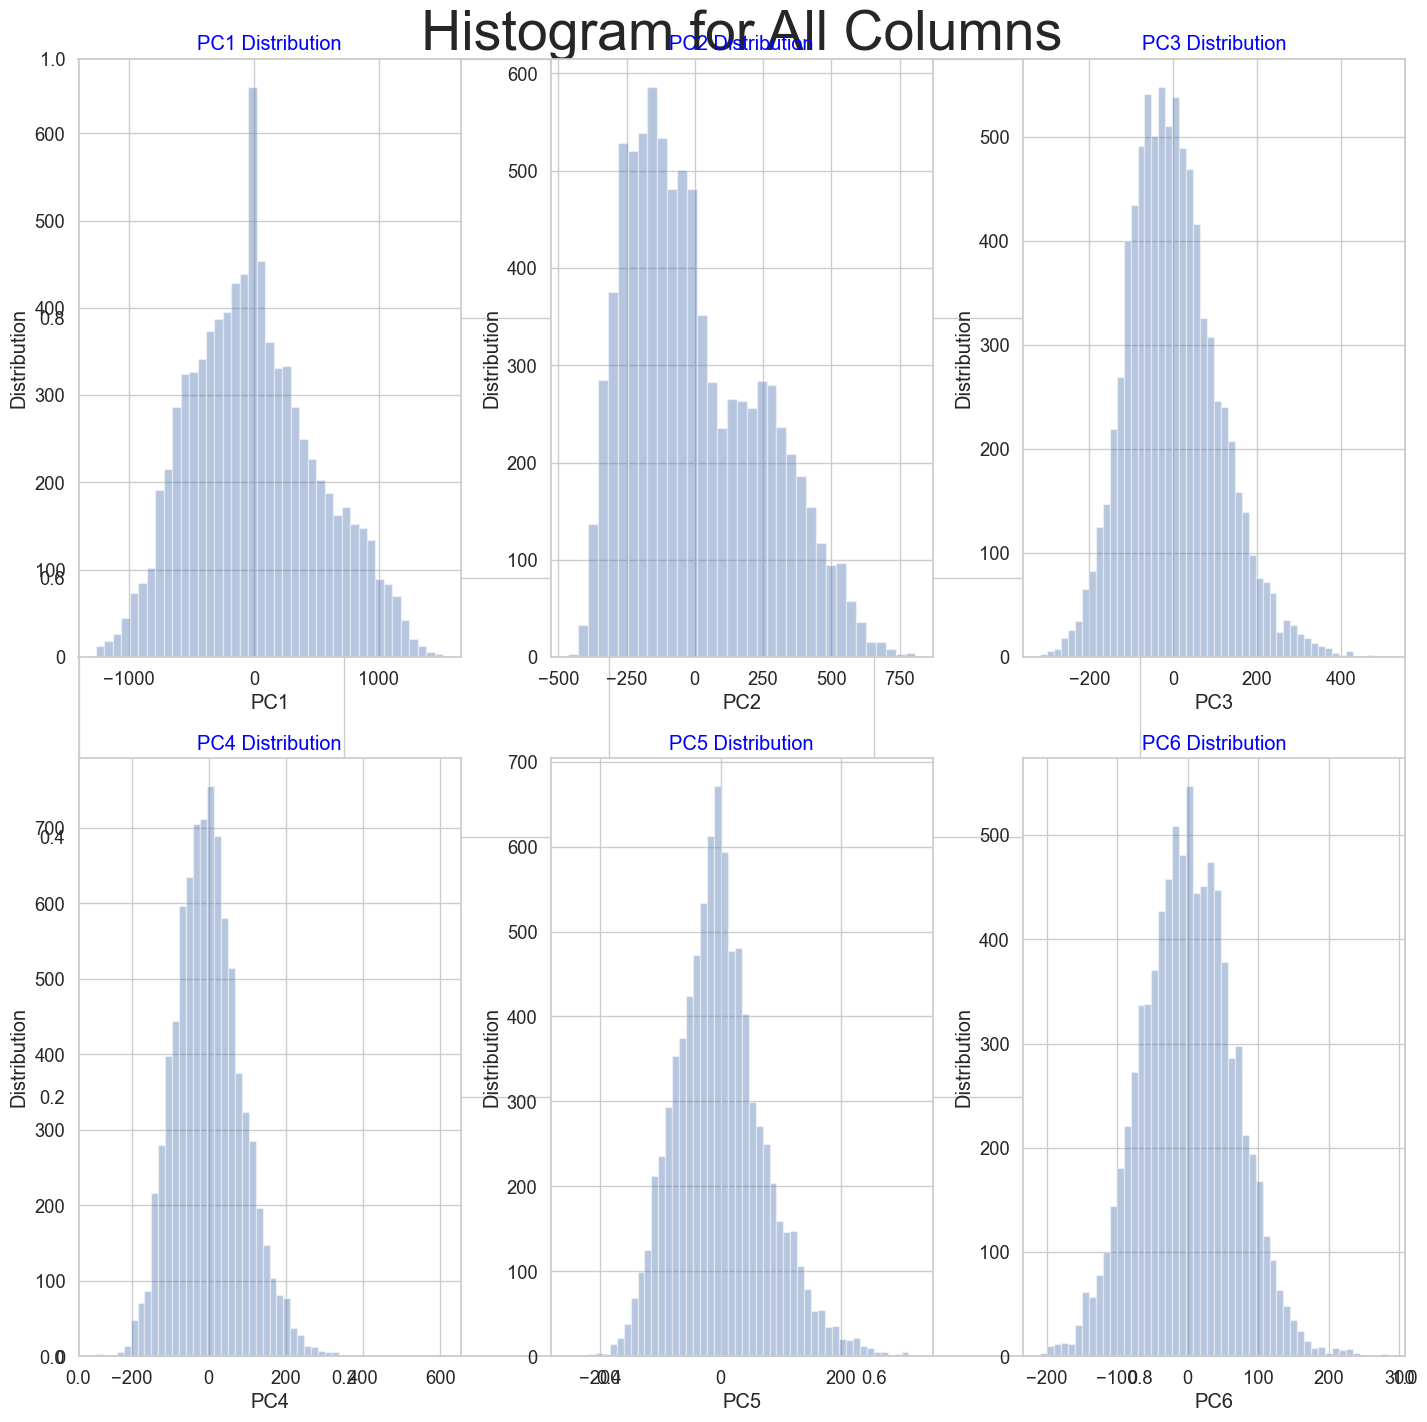

In [28]:
#Plot grid histogram of all principal component axes:
f=plt.figure(figsize=(15,15))
plt.title('Histogram for All Columns', fontsize = 40)
for i, col in enumerate(df_pca.columns):
    ax=f.add_subplot(2,3,i+1)
    sns.distplot(df_pca[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

=END OF REPORT=